<a href="https://colab.research.google.com/github/Priyanka1823/AICodes/blob/main/Lab7_n_armed_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt

# Set a seed for reproducibility
random.seed(42)

# --- Class Definition for a Binary Bandit ---
class SimpleBinaryBandit:
    def __init__(self):
        # Initialize number of arms
        self.num_arms = 2
        # Store the probabilities for each action
        self.probabilities = [random.random() for _ in range(self.num_arms)]

    def available_actions(self):
        """Return a list of available actions (arms)."""
        return list(range(self.num_arms))

    def get_reward(self, action):
        """Simulate receiving a reward for taking the specified action."""
        if random.random() < self.probabilities[action]:
            return 1  # Success
        return 0  # Failure

# Example usage:
if __name__ == "__main__":
    bandit = SimpleBinaryBandit()
    actions = bandit.available_actions()

    # Test rewards for each action
    for action in actions:
        reward = bandit.get_reward(action)
        print(f"Action: {action}, Reward: {reward}")



Action: 0, Reward: 1
Action: 1, Reward: 0


Final counts for action 1: 4736
Final counts for action 2: 264


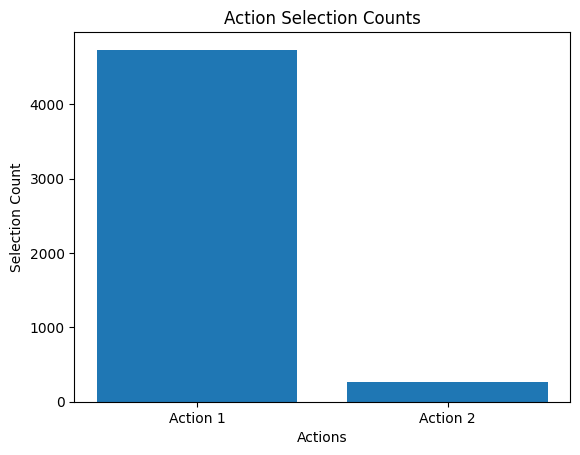

******************        RESULTS FOR BANDIT A         *************************
Observed Average Reward over 5000 experiments for action 1: 0.5758023648648655
Observed Average Reward over 5000 experiments for action 2: 0.4090909090909091
----------------------------------------------------------------------------------
Actual Reward for action 1: 0.5714025946899135
Actual Reward for action 2: 0.4288890546751146
**********************************************************************************


In [ ]:
import random
import matplotlib.pyplot as plt

# --- Binary Bandit Class ---
class BinaryBandit(object):
    def __init__(self):
        # Number of arms
        self.N = 2
        self.p = [random.random() for _ in range(self.N)]  # Probabilities for each action

    def actions(self):
        return list(range(self.N))  # Return available actions

    def reward(self, action):
        return 1 if random.random() < self.p[action] else 0  # Return reward based on the action probability


def epsilon_greedy_binary(bandit_instance, epsilon, max_iterations):
    # Initialize action-value estimates and counts
    action_values = [0] * bandit_instance.N
    action_counts = [0] * bandit_instance.N
    rewards = []
    cumulative_average = [0]  # Cumulative average of rewards

    # Run the epsilon-greedy algorithm for the specified number of iterations
    for iteration in range(1, max_iterations + 1):
        # Choose action based on epsilon-greedy strategy
        if random.random() > epsilon:
            # Exploit: choose the action with the highest estimated value
            action = action_values.index(max(action_values))
        else:
            # Explore: choose a random action
            action = random.choice(bandit_instance.actions())

        # Receive a reward for the chosen action
        reward = bandit_instance.reward(action)
        rewards.append(reward)

        # Update action counts and action value estimates
        action_counts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_counts[action]

        # Update cumulative average of rewards
        cumulative_average.append(cumulative_average[iteration - 1] + (reward - cumulative_average[iteration - 1]) / iteration)

        # Print results and plot after the last iteration
        if iteration == max_iterations:
            print(f"Final counts for action 1: {action_counts[0]}")
            print(f"Final counts for action 2: {action_counts[1]}")

            actions_taken = ["Action 1", "Action 2"]
            # Create a bar plot for the number of times each action was taken
            plt.bar(actions_taken, action_counts)

            # Set plot title and axis labels
            plt.title("Action Selection Counts")
            plt.xlabel("Actions")
            plt.ylabel("Selection Count")

            # Display the plot
            plt.show()

    return action_values, cumulative_average, rewards



Final counts for action 1: 4736
Final counts for action 2: 264


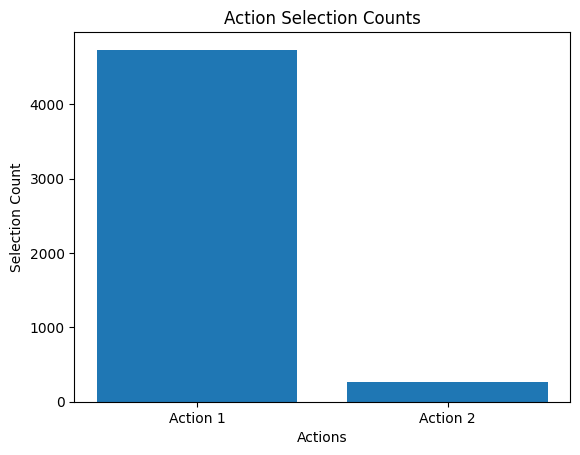

******************        RESULTS FOR BANDIT A         *************************
Observed Average Reward over 5000 experiments for action 1: 0.5758023648648655
Observed Average Reward over 5000 experiments for action 2: 0.4090909090909091
----------------------------------------------------------------------------------
Actual Reward for action 1: 0.5714025946899135
Actual Reward for action 2: 0.4288890546751146
**********************************************************************************


In [ ]:
# Set random seed for reproducibility
random.seed(10)

# Create an instance of the BinaryBandit
myBanditA = BinaryBandit()

# Run the epsilon-greedy algorithm
Q, R_avg, R = epsilon_greedy_binary(myBanditA, 0.1, 5000)

# Print results
print("******************        RESULTS FOR BANDIT A         *************************")
print("Observed Average Reward over 5000 experiments for action 1:", Q[0])
print("Observed Average Reward over 5000 experiments for action 2:", Q[1])
print("----------------------------------------------------------------------------------")
print("Actual Reward for action 1:", myBanditA.p[0])
print("Actual Reward for action 2:", myBanditA.p[1])
print("**********************************************************************************")

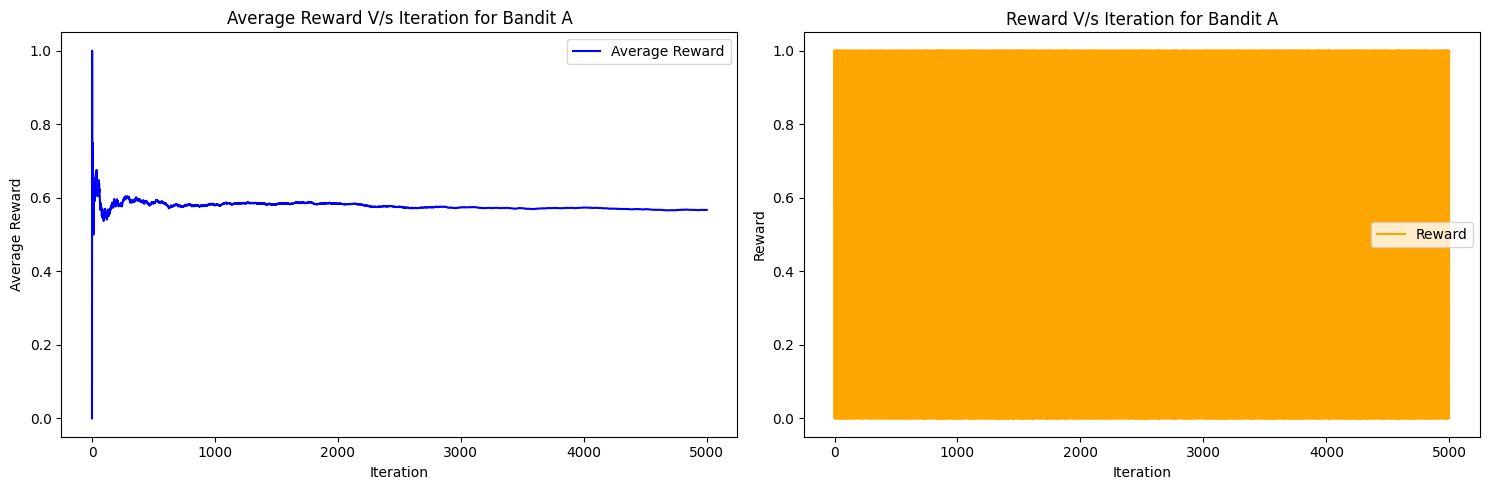

In [ ]:
import matplotlib.pyplot as plt

# Assuming R_avg and R are already defined in your code
# Display the images
fig, (x1, x2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting average reward vs iteration for Bandit A
x1.plot(R_avg, color='blue', label='Average Reward')
x1.title.set_text("Average Reward V/s Iteration for Bandit A")
x1.set_xlabel("Iteration")
x1.set_ylabel("Average Reward")
x1.legend()

# Plotting reward vs iteration for Bandit A
x2.plot(R, color='orange', label='Reward')
x2.title.set_text("Reward V/s Iteration for Bandit A")
x2.set_xlabel("Iteration")
x2.set_ylabel("Reward")
x2.legend()

# Display the plots
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

Final counts for action 1: 4736
Final counts for action 2: 264


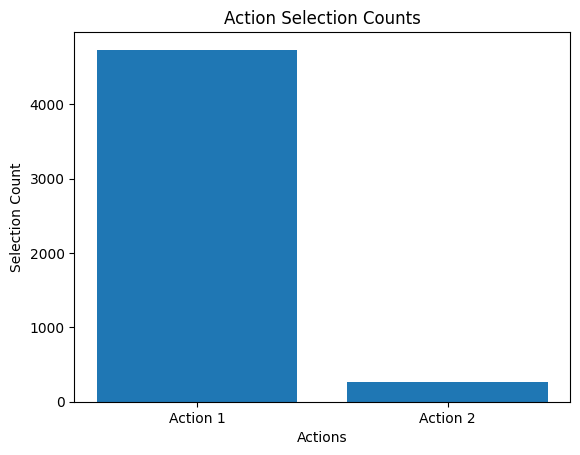

************************        RESULTS FOR BANDIT B         ******************************
Observed Average Reward over 5000 experiments for action 1: 0.5758023648648655
Observed Average Reward over 5000 experiments for action 2: 0.4090909090909091
---------------------------------------------------------------------------------------------
Actual Reward for action 1: 0.5714025946899135
Actual Reward for action 2: 0.4288890546751146
**********************************************************************************************


In [ ]:
import random
import matplotlib.pyplot as plt

# Assuming the BinaryBandit and eGreedy_binary classes/functions are defined as before

# Set random seed for reproducibility
random.seed(10)

# Create an instance of BinaryBandit for Bandit B
myBanditB = BinaryBandit()

# Run the epsilon-greedy algorithm for Bandit B
Q, R_avg, R = epsilon_greedy_binary(myBanditB, 0.1, 5000)

# Display results for Bandit B
print("************************        RESULTS FOR BANDIT B         ******************************")
print("Observed Average Reward over 5000 experiments for action 1:", Q[0])
print("Observed Average Reward over 5000 experiments for action 2:", Q[1])
print("---------------------------------------------------------------------------------------------")
print("Actual Reward for action 1:", myBanditB.p[0])
print("Actual Reward for action 2:", myBanditB.p[1])
print("**********************************************************************************************")


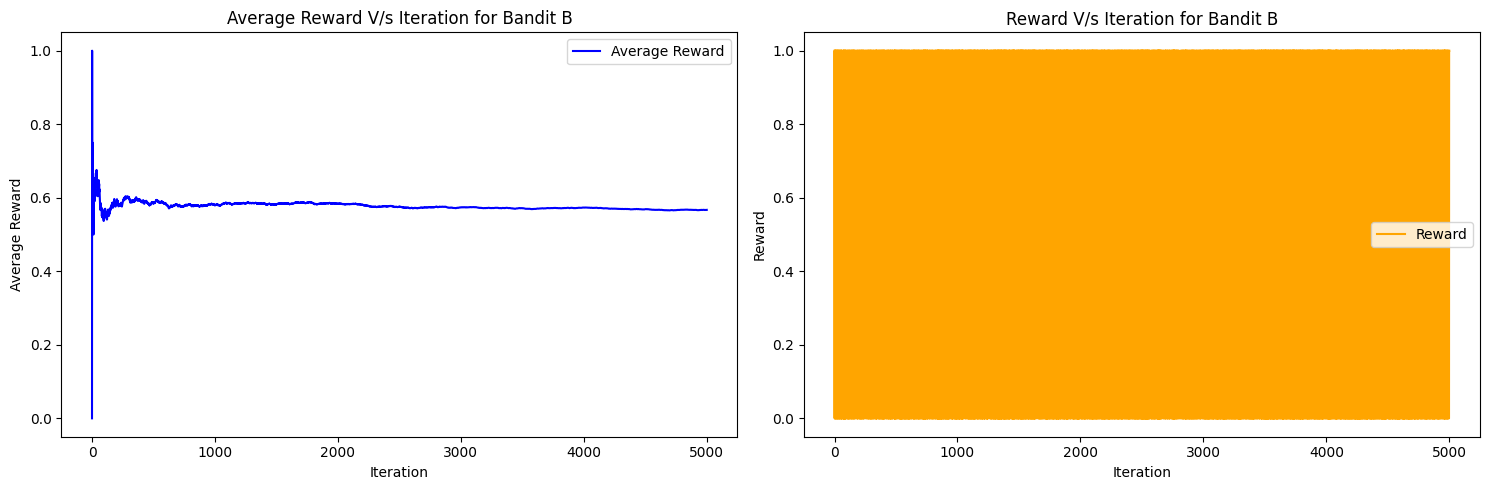

In [ ]:

# Assuming R_avg and R are already defined for Bandit B
# Display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotting average reward vs iteration for Bandit B
ax1.plot(R_avg, color='blue', label='Average Reward')
ax1.title.set_text("Average Reward V/s Iteration for Bandit B")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax1.legend()

# Plotting reward vs iteration for Bandit B
ax2.plot(R, color='orange', label='Reward')
ax2.title.set_text("Reward V/s Iteration for Bandit B")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")
ax2.legend()

# Display the plots
plt.tight_layout()  # Adjusts the subplots to fit into the figure area.
plt.show()

Actual	Estimated
2.134 	 5.537
5.026 	 6.005
22.210 	 13.749
16.318 	 13.448
5.989 	 8.532
4.614 	 5.632
4.320 	 6.647
21.672 	 19.298
11.815 	 5.098
-1.058 	 7.694
Total Squared Error =  232.63231023005866


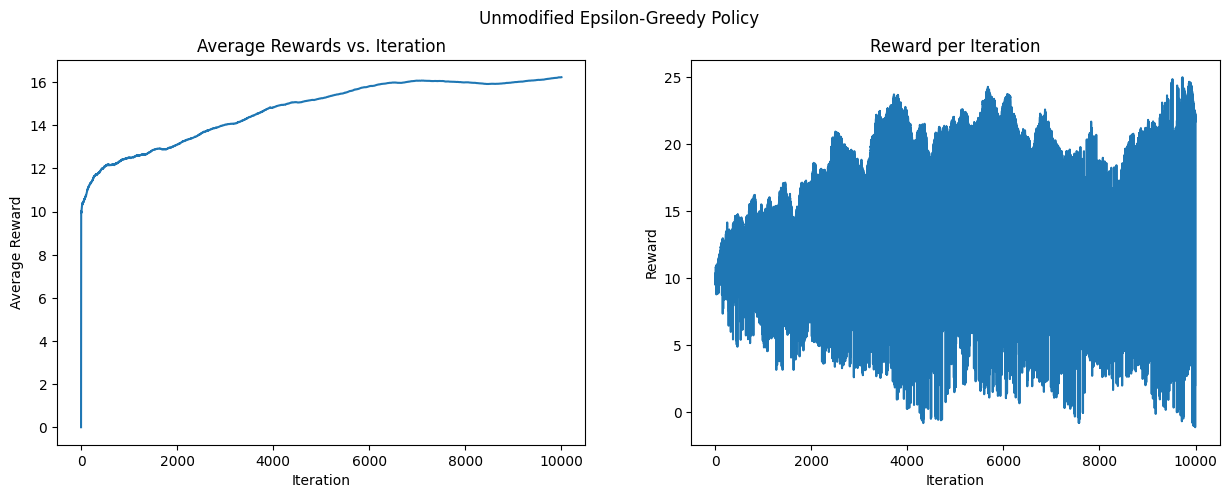

In [ ]:
import random
import matplotlib.pyplot as plt

class NonStationaryBandit:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.expected_rewards = [10.0] * num_arms  # Initial expected rewards

    def available_actions(self):
        return list(range(self.num_arms))

    def get_reward(self, action):
        # Introduce non-stationarity with Gaussian noise
        for i in range(self.num_arms):
            self.expected_rewards[i] += random.gauss(0, 0.1)

        # Calculate the reward for the chosen action
        return self.expected_rewards[action] + random.gauss(0, 0.01)

def epsilon_greedy_strategy(bandit, epsilon, num_iterations):
    estimated_values = [0.0] * bandit.num_arms  # Estimated rewards for actions
    counts = [0] * bandit.num_arms  # Counts of action selections
    rewards_log = []  # To store rewards received
    avg_rewards_log = [0.0]  # Track average reward over time

    for iteration in range(1, num_iterations + 1):
        if random.random() > epsilon:
            action = estimated_values.index(max(estimated_values))  # Select best action
        else:
            action = random.choice(bandit.available_actions())  # Random action

        reward = bandit.get_reward(action)
        rewards_log.append(reward)

        counts[action] += 1
        # Update estimated values incrementally
        estimated_values[action] += (reward - estimated_values[action]) / counts[action]

        # Update average rewards
        avg_rewards_log.append(avg_rewards_log[-1] + (reward - avg_rewards_log[-1]) / iteration)

    return estimated_values, avg_rewards_log, rewards_log

def plot_results(avg_rewards, rewards):
    # Create subplots to display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(avg_rewards)
    ax1.set_title("Average Rewards vs. Iteration")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Average Reward")

    ax2.plot(rewards)
    ax2.set_title("Reward per Iteration")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Reward")

    fig.suptitle("Unmodified Epsilon-Greedy Policy")
    plt.show()

# Set seed for reproducibility
random.seed(10)

# Initialize the non-stationary bandit with 10 arms
bandit_instance = NonStationaryBandit(10)

# Execute the epsilon-greedy strategy for 10,000 iterations with epsilon of 0.3
estimated_rewards, average_rewards, rewards = epsilon_greedy_strategy(bandit_instance, 0.3, 10000)

# Print actual and estimated rewards
print("Actual\tEstimated")
total_squared_error = 0
for actual, estimated in zip(bandit_instance.expected_rewards, estimated_rewards):
    print(f"{actual:.3f} \t {estimated:.3f}")
    total_squared_error += (actual - estimated) ** 2

print('Total Squared Error = ', total_squared_error)

# Plot the results
plot_results(average_rewards, rewards)


Actual	Recovered
13.321 	 14.895
12.914 	 13.126
2.601 	 0.310
3.148 	 5.674
25.191 	 25.654
19.187 	 17.701
4.233 	 5.310
9.313 	 10.945
16.936 	 15.720
-0.824 	 -1.310
Total Squared Error =  22.113072924574873


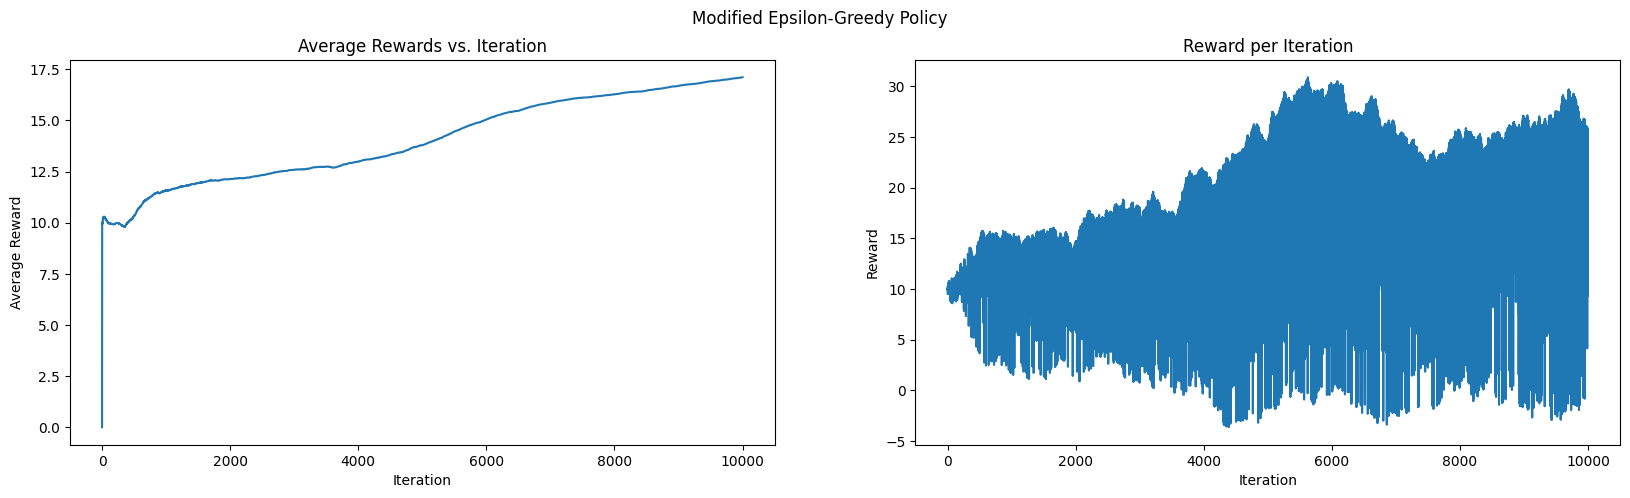

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Bandit:
    def __init__(self, N):
        self.N = N
        self.expected_rewards = [10.0] * N  # Initialize expected rewards

    def actions(self):
        return list(range(self.N))

    def reward(self, action):
      result = []

      for i in range(len(self.expected_rewards)):
        self.expected_rewards[i]+=random.gauss(0,0.1)# Rewards with random Gaussian / original non stationary change

      result = self.expected_rewards[action]+random.gauss(0,0.01)
      return result

def eGreedy_modified(bandit, epsilon, max_iterations, alpha):
    # Initialization
    Q = [0] * bandit.N  # Estimated average rewards
    count = [0] * bandit.N  # Count of times each action has been taken
    rewards = []  # Store rewards received
    average_rewards = [0]  # Track average reward over iterations

    # Incremental implementation over the specified number of iterations
    for iteration in range(1, max_iterations + 1):
        # Choose action based on epsilon-greedy strategy
        if random.random() > epsilon:
            action = Q.index(max(Q))  # Exploitation
        else:
            action = random.choice(bandit.actions())  # Exploration

        r = bandit.reward(action)  # Get the reward for the chosen action
        rewards.append(r)

        count[action] += 1  # Update counts for the chosen action
        Q[action] += alpha * (r - Q[action])  # Incremental average update
        average_rewards.append(average_rewards[-1] + (r - average_rewards[-1]) / iteration)

    return Q, average_rewards, rewards

# Set seed for reproducibility
random.seed(10)
myBandit = Bandit(N=10)

# Run the modified epsilon-greedy algorithm
Q, R_avg, R = eGreedy_modified(myBandit, 0.4, 10000, 0.1)

# Print actual and estimated rewards
print("Actual\tRecovered")
total_squared_error = 0
for actual, estimated in zip(myBandit.expected_rewards, Q):
    print(f"{actual:.3f} \t {estimated:.3f}")
    total_squared_error += (actual - estimated) ** 2

print('Total Squared Error = ', total_squared_error)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(R_avg)
ax1.set_title("Average Rewards vs. Iteration")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")

ax2.plot(R)
ax2.set_title("Reward per Iteration")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")

fig.suptitle("Modified Epsilon-Greedy Policy")
plt.show()
